## Convolutional Neural Network

#### Import libraries

In [10]:
#pip install tensorflow

In [11]:
#pip install keras

In [3]:
import numpy as np
import pandas as pd

In [12]:
#pip install keras.models

In [13]:
from keras.utils import to_categorical

In [14]:
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

#### Import  data

In [15]:
df=pd.read_csv('modified_data/combined_csv.csv')

df.head()

Unnamed: 0    font fontVariant  m_label  strength  italic  orientation  \
0         226  AGENCY   AGENCY FB       57       0.4       0          0.0   
1         227  AGENCY   AGENCY FB       56       0.4       0          0.0   
2         228  AGENCY   AGENCY FB       55       0.4       0          0.0   
3         229  AGENCY   AGENCY FB       54       0.4       0          0.0   
4         230  AGENCY   AGENCY FB       53       0.4       0          0.0   

   m_top  m_left  originalH  ...  r19c10  r19c11  r19c12  r19c13  r19c14  \
0     35      24         51  ...     255     255     255     255     255   
1     35      24         51  ...     255     255     255     255     255   
2     35      22         51  ...      27       1       1       1       1   
3     35      24         51  ...     255     255     255     255     255   
4     35      24         51  ...     255     255     255     255     255   

   r19c15  r19c16  r19c17  r19c18  r19c19  
0     255     255     255     165      60  
1     255     255     255     165      60  
2       1       1       1       1       1  
3     255     255     255     165      60  
4     255     255     255     165      60  

[5 rows x 413 columns]

In [19]:
#df=df.drop(columns=['Unnamed: 0','font', 'fontVariant','strength','italic','orientation','m_top','m_left','originalH','originalW','h','w'])

In [ ]:
#df=df.drop(columns=['originalW','h','w'])

In [20]:
df.m_label.unique()

array([57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 46, 44])

In [21]:
df.head()

m_label  r0c0  r0c1  r0c2  r0c3  r0c4  r0c5  r0c6  r0c7  r0c8  ...  r19c10  \
0       57    60   165   255   255   255   255   255   255   255  ...     255   
1       56    60   165   255   255   255   255   255   255   255  ...     255   
2       55   255   255   255   255   255   255   255   255   255  ...      27   
3       54    60   165   255   255   255   255   255   255   255  ...     255   
4       53   255   255   255   255   255   255   255   255   255  ...     255   

   r19c11  r19c12  r19c13  r19c14  r19c15  r19c16  r19c17  r19c18  r19c19  
0     255     255     255     255     255     255     255     165      60  
1     255     255     255     255     255     255     255     165      60  
2       1       1       1       1       1       1       1       1       1  
3     255     255     255     255     255     255     255     165      60  
4     255     255     255     255     255     255     255     165      60  

[5 rows x 401 columns]

In [22]:
df.to_csv( "FINAL.csv", index=False, encoding='utf-8-sig')

In [23]:
DF_FINAL=pd.read_csv('FINAL.csv')

#### Create a dictionary to recognize the labels of the images we want, based on ASCII characters

In [24]:
#hacer diccionario 
#pasar diccionario a columna Y (m:label)
#hacer to_category

In [25]:
di={48:0, 49:1, 50:2,51:3,52:4,53:5,54:6,55:7,56:8,57:9,44:10,46:11}
#10 es coma, 11 es punto

In [28]:
#df['col1'].replace(di, inplace=True)

In [29]:
DF_FINAL= DF_FINAL.replace({"m_label": di})

In [30]:
DF_FINAL.m_label.unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 11, 10])

In [31]:
import random

filename = "FINAL.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//50  # sample size of 2%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 

In [ ]:
#dataframe.info

In [32]:
dataframe = pd.read_csv(filename, skiprows=skip)

In [33]:
dataframe.head()

m_label  r0c0  r0c1  r0c2  r0c3  r0c4  r0c5  r0c6  r0c7  r0c8  ...  r19c10  \
0       48     1     1     1     1   255   255   255   255   255  ...     255   
1       53    25    24    22    53    68   130   162   226   236  ...     214   
2       57     1     1     1     1     1     1   216   255   255  ...     255   
3       51     6    10    17    90   127   227   236   253   255  ...     253   
4       51    32    37    43    92   132   191   218   226   233  ...     244   

   r19c11  r19c12  r19c13  r19c14  r19c15  r19c16  r19c17  r19c18  r19c19  
0     255     255     255     171       1       1       1       1       1  
1     206     190     142     118      64      48      15      17      18  
2     255     255      86       1       1       1       1       1       1  
3     248     238     172     140     109      84      35      18      10  
4     244     236     220     148     103      72      43      37      32  

[5 rows x 401 columns]

In [34]:
dataframe= dataframe.replace({"m_label": di})

In [35]:
dataframe.m_label.unique()

array([ 0,  5,  9,  3,  7,  6,  1,  2,  8,  4, 11, 10])

In [36]:
dataframe.shape

(4474, 401)

In [37]:
#fonts=dataframe.drop(columns=['Unnamed: 0'])

In [38]:
#fonts.info

#### Plot font pictures

In [39]:
import matplotlib.pyplot as plt

In [40]:
plt.figure(figsize=(5,5))
plt.imshow(dataframe.values[45,1:].reshape(20,20))
plt.show();

#### Assure m_label only has 12 tags

In [41]:
dataframe.m_label.unique()

array([ 0,  5,  9,  3,  7,  6,  1,  2,  8,  4, 11, 10])

In [42]:
input_shape=(20, 20, 1)

#### Define X and y 

In [43]:
X=np.array(dataframe.iloc[:, 1:])

In [44]:
X.shape

(4474, 400)

In [45]:
primer_paso_y=np.array(dataframe.iloc[:,0])

In [46]:
len(primer_paso_y)

4474

In [47]:
primer_paso_y

array([ 0,  5,  9, ...,  3, 11,  0])

#### Change y to categorical 

In [48]:
y=to_categorical(primer_paso_y)

In [49]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
y.shape

(4474, 12)

#### Train, test, split

In [51]:
from sklearn.model_selection import train_test_split as tts

In [52]:
X_train, X_test, y_train, y_test=tts(X, y)

In [53]:
X_train=X_train.reshape(X_train.shape[0], 20, 20, 1).astype('float32')/255

X_test=X_test.reshape(X_test.shape[0], 20, 20, 1).astype('float32')/255

In [54]:
batch=256 #entrenar con varios ejemplos a la vez
n_clases=12 #we have 12 classes as defined in the dictionary numbers, point and comma
epocas=200 #numero de veces que enseñamos a la red neunoral los ejemplos

In [55]:

y.shape


(4474, 12)

In [56]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Model: SEQUENTIAL

In [57]:
from tensorflow.keras import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [58]:
from tensorflow import keras

In [59]:
modelo=Sequential()
modelo.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                  kernel_initializer='he_normal', input_shape=input_shape))

modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(Dropout(0.4))

modelo.add(Flatten())
modelo.add(Dense(128,  activation='relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(n_clases, activation='softmax'))


modelo.compile(loss=keras.losses.categorical_crossentropy, 
               optimizer=keras.optimizers.Adam(), 
               metrics=['accuracy'])

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 128)         7

In [60]:
import time

In [61]:
%%time
historico=modelo.fit(X_train, y_train, batch_size=batch, epochs=epocas, verbose=0)

CPU times: user 7min 51s, sys: 1min 29s, total: 9min 20s
Wall time: 3min 20s


In [62]:
score=modelo.evaluate(X_test, y_test, verbose=0)

#### Check accuracy of model

In [63]:
print ('Perdida testeo: ', score[0])
print ('Accuracy testeo: ', score[1])

Perdida testeo:  0.25406813621520996
Accuracy testeo:  0.9472743272781372


#### 95% of accuracy, great!

In [64]:
acc=historico.history['accuracy']
loss=historico.history['loss']

epocas=range(len(acc))

#### Test if model works

+ PLOT IMAGE TO PREDICT 

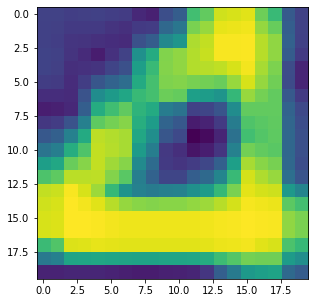

In [65]:
plt.figure(figsize=(5,5))
plt.imshow(dataframe.values[55,1:].reshape(20,20))
plt.show();

In [71]:
y=modelo.predict(dataframe.values[55,1:].reshape(1, 20, 20, 1).astype('float32')/255)
#this predicst the probability of the image to be the tags below

In [72]:
y.argmax() #number prediction - argmax gives the index of the maximum probability

4

#### Model works!!!